In [116]:
using Revise
using DynamicsAndControl
using OrdinaryDiffEq

In [117]:
using LinearAlgebra

In [118]:
using Plots

In [119]:
include("yak_hack.jl")

sim = Simulation(
                    ( :truth, YakAircraft, () ),
                    ( :controller, YakController, () ),
                    10.0, RK4(), dt=0.02
               )

data, sol = simulate(sim)

(DynamicsAndControl.SimulationDataset(LogDataSink(Dict{DynamicsAndControl.LogDataFlowId,Dict{Symbol,Array{T,1} where T}}(DynamicsAndControl.LogDataFlowId{2}((:truth, :state)) => Dict(:v => SArray{Tuple{3},Float64,1,3}[[5.0, 0.0, 0.0], [5.01280134515128, -5.605404245475851e-5, -0.1922860639392217], [5.028211788200231, -0.0003820752495077769, -0.30136007082918814], [5.044973760053599, -0.001083844475824275, -0.35023792654745667], [5.061284445848228, -0.0021251852818363628, -0.3614737977589523], [5.076221211172374, -0.003382248247529297, -0.3527063927930508], [5.089731885178947, -0.004697145748872206, -0.33597540923075275], [5.102189669528721, -0.005919389534756967, -0.31858752562795695], [5.114036549845437, -0.006931508244884155, -0.30430430808471687], [5.125617269711798, -0.007660423401192231, -0.2944446462244255]  …  [1.7350279456188114, 5.516160825294683, 0.34087338943408857], [1.6626173107398905, 5.522915560745104, 0.3510132442879659], [1.589524025265212, 5.528715848521717, 0.3602603

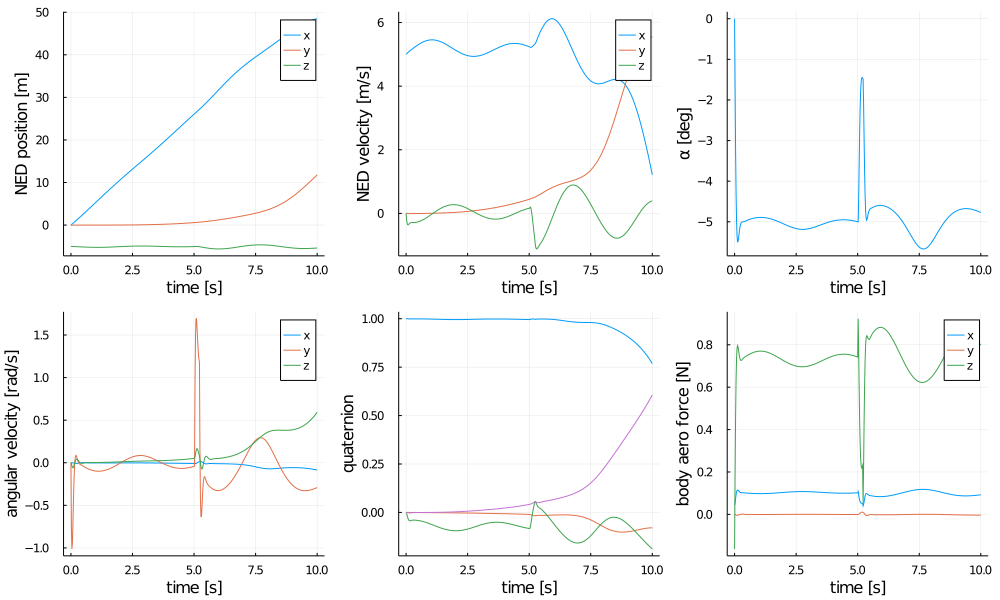

In [120]:
plot(
    plot(data.truth.state.time, data.truth.state.r, label=["x" "y" "z"], ylabel="NED position [m]"),
    plot(data.truth.state.time, data.truth.state.v, label=["x" "y" "z"],ylabel="NED velocity [m/s]"),
    plot(data.truth.debug.time, data.truth.debug.a_rin.*180/π, legend=false, ylabel="α [deg]"),
    plot(data.truth.state.time, data.truth.state.ω, label=["x" "y" "z"],ylabel="angular velocity [rad/s]"),
    plot(data.truth.state.time, data.truth.state.q, legend=false,ylabel="quaternion"),
    plot(data.truth.debug.time, data.truth.debug.F_aero, label=["x" "y" "z"],ylabel="body aero force [N]"),
    size=(1000, 600), xlabel="time [s]", fmt=:png
)

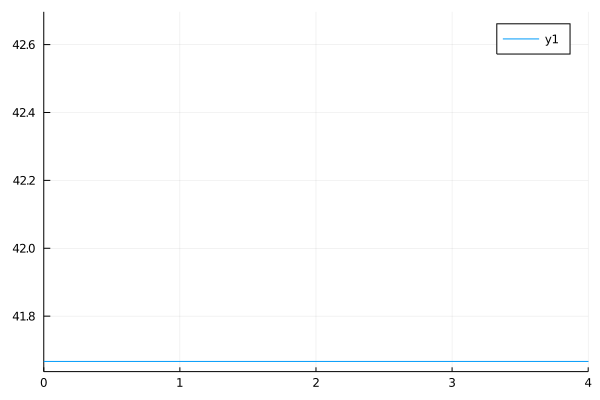

In [121]:
plot(data.controller.time, data.controller.thr, xlim=(0.0, 4.0))

In [124]:
data

DynamicsAndControl.SimulationDataset(LogDataSink(Dict{DynamicsAndControl.LogDataFlowId,Dict{Symbol,Array{T,1} where T}}(DynamicsAndControl.LogDataFlowId{2}((:truth, :state)) => Dict(:v => SArray{Tuple{3},Float64,1,3}[[5.0, 0.0, 0.0], [5.01280134515128, -5.605404245475851e-5, -0.1922860639392217], [5.028211788200231, -0.0003820752495077769, -0.30136007082918814], [5.044973760053599, -0.001083844475824275, -0.35023792654745667], [5.061284445848228, -0.0021251852818363628, -0.3614737977589523], [5.076221211172374, -0.003382248247529297, -0.3527063927930508], [5.089731885178947, -0.004697145748872206, -0.33597540923075275], [5.102189669528721, -0.005919389534756967, -0.31858752562795695], [5.114036549845437, -0.006931508244884155, -0.30430430808471687], [5.125617269711798, -0.007660423401192231, -0.2944446462244255]  …  [1.7350279456188114, 5.516160825294683, 0.34087338943408857], [1.6626173107398905, 5.522915560745104, 0.3510132442879659], [1.589524025265212, 5.528715848521717, 0.36026032